# CNN on data 1

Made CNN network with the first section of data sent following this tutorial

https://www.youtube.com/watch?v=jztwpsIzEGc&t=363s

# Set up

In [1]:
# in google colab there are multiple versions of tensorflow
%tensorflow_version 2.x
import tensorflow as tf
print(tf.version)
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt 
import os
import cv2
import imghdr

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.8/dist-packages/tensorflow/_api/v2/version/__init__.py'>


# Load data

In [2]:
data_dir = 'data'
extensions = ['.tif', 'tiff', 'jpeg']

In [3]:
# see how to get list of images
os.listdir(data_dir) # finds the folders of data
os.listdir(os.path.join(data_dir, 'saturated')) # finds every image in this folder


['L_1_C001H001S0001000001.jpg',
 '.ipynb_checkpoints',
 'L_8_C001H001S0001000001.jpg',
 'L_3_C001H001S0001000001.jpg',
 'L_7_C001H001S0001000001.jpg',
 'L_6_C001H001S0001000001.jpg',
 'L_2_C001H001S0001000001.jpg',
 'L_4_C001H001S0001000001.jpg',
 'L_5_C001H001S0001000001.jpg']

In [4]:
img_test = cv2.imread(os.path.join('data', 'unsaturated', 'C_3_C001H001S0001000001.jpg'))

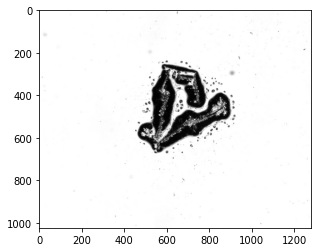

In [5]:
img_test.shape
plt.imshow(img_test)

In [6]:
# get rid of wierd or dodgy images
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    # check that the images are good
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      
      if tip not in extensions:
        print("img not in ext list {}".format(image_path))
        print(tip)
        os.remove(image_path) 
    except Exception as e:
      print("issue with image {}".format(image_path))


issue with image data/saturated/.ipynb_checkpoints


In [7]:
# use keras data pipline
# builds dataset and labels for you
# makes image 256*256
data = tf.keras.utils.image_dataset_from_directory('data', 
                                                   image_size=(700, 700))


Found 85 files belonging to 2 classes.


In [8]:
# cant just look at data, need to make an iterator
# Allows us to access data pipeline

data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [10]:
# look st some of the data (lots of 255 is white background)
batch[0].shape # images as numpy arrays
batch[1]

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

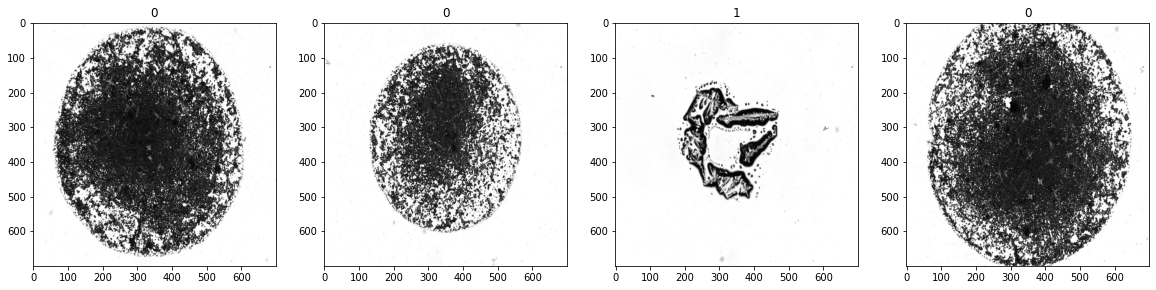

In [11]:
# check which class is assigned to which image
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(np.squeeze(img.astype(int)))
  ax[idx].title.set_text(batch[1][idx])

# Preprocess data


In [12]:
# Scale the data
# data.map allows you to perform transformation within pipeline 
# x represents images, y is target variable
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [13]:
# look at data
data.as_numpy_iterator().next()

(array([[[[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         ...,
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]],
 
         [[1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.],
          ...,
          [1., 1., 1.],
          [1., 1., 1.],
          [1., 1., 1.]]],
 
 
        [

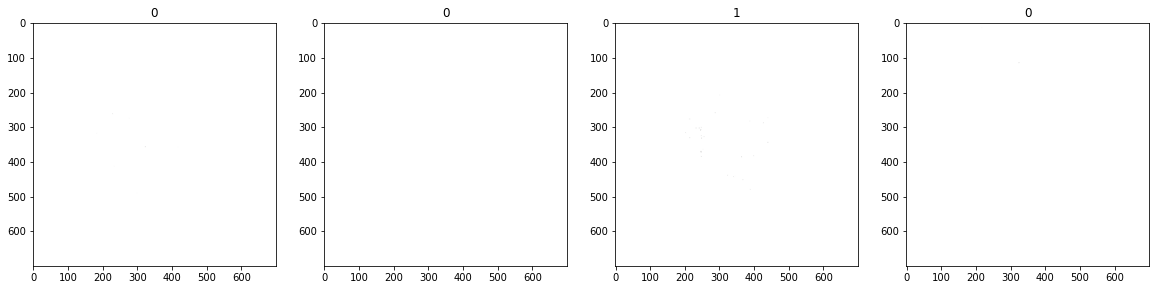

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(batch[1][idx])

In [15]:
# split data
print(len(data))
# should have cross validation too but not enought data
train_size = int(len(data)*0.7)
test_size = int(len(data)*0.3)+1
# we onyl have 3 batches for this data so ensure that train on 2 batches and 
# test one batch

3


In [16]:
train_size + test_size

3

In [17]:
train = data.take(train_size) # takes train_size batches from data. (data is already shuffled)
test = data.skip(train_size).take(test_size)

# Build Neural Network

In [18]:
#from tensorflow.keras.model import Sequential # good for one input one output models
#from tensorflow.keras.layers import Conv2D, Maxpooling2D, Dense, Flatten

In [19]:
model = keras.Sequential()

In [20]:
# first layer needs to have an input or be an input layer
#16 filters 3*3 pixels with a stride of 1
model.add(keras.layers.Conv2D(16, (3,3), 1, activation='relu', 
                             input_shape=(700,700,3)))
# take max val after relu activation and return that value
# condenses data
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(32, (3,3), 1, activation='relu'))
model.add(keras.layers.MaxPooling2D())

model.add(keras.layers.Conv2D(16, (3,3), 1, activation='relu'))
model.add(keras.layers.MaxPooling2D())

# Flatten the data
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))


In [21]:
model.compile(optimizer='adam', 
              loss = tf.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 698, 698, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 349, 349, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 347, 347, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 173, 173, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 171, 171, 16)      4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 85, 85, 16)       0

# Train

In [23]:
logdir = 'logs'

In [24]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [25]:
# epoch: how many times to train over
# should also include validation here but need more data for that
hist = model.fit(train, epochs = 5, callbacks=[tensorboard_callback])

Epoch 1/5
2/2 [==============================] - 37s 17s/step - loss: 9.3670 - accuracy: 0.9062
Epoch 2/5
2/2 [==============================] - 36s 17s/step - loss: 9.0218 - accuracy: 0.9062
Epoch 3/5
2/2 [==============================] - 36s 18s/step - loss: 23.0334 - accuracy: 0.5156
Epoch 4/5
2/2 [==============================] - 36s 18s/step - loss: 0.4638 - accuracy: 0.9688
Epoch 5/5
2/2 [==============================] - 37s 17s/step - loss: 3.0880 - accuracy: 0.9062


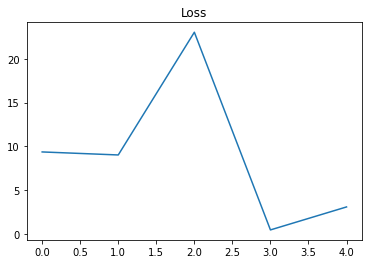

In [28]:
# plot performance of model
fig = plt.figure()
plt.plot(hist.history['loss'], label='loss')
plt.title('Loss')
plt.show()

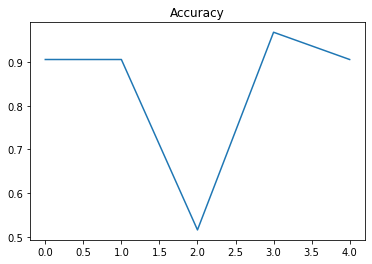

In [27]:
# plot performance of model
fig = plt.figure()
plt.plot(hist.history['accuracy'], label='loss')
plt.title('Accuracy')
plt.show()

# Evaluate the model

In [29]:
# use standard measures for classification
pre = keras.metrics.Precision()
re = keras.metrics.Recall()
acc = keras.metrics.BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator():
  x, y = batch
  yhat = model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 4s 4s/step


In [32]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy {acc.result().numpy()}')

Precision: 1.0, Recall: 1.0, Accuracy 1.0
